In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

Read the file 

In [3]:
df_iris = pd.read_csv('iris-data.csv')

Classes بفصل ال

In [11]:
df_setosa_petal= df_iris[df_iris.iris_class == 'Iris-setosa']
df_versicolor_petal= df_iris[df_iris.iris_class == 'Iris-versicolor']
df_virginica_petal= df_iris[df_iris.iris_class == 'Iris-virginica']

 لكل وحدة length and width بخزن ال

In [12]:
versicolor_petal_length=np.array(df_versicolor_petal['petal_length_cm'])
versicolor_petal_width=np.array(df_versicolor_petal['petal_width_cm'])

In [13]:
virginica_petal_length=np.array(df_virginica_petal['petal_length_cm'])
virginica_petal_width=np.array(df_virginica_petal['petal_width_cm'])

In [14]:
setosa_petal_length=np.array(df_setosa_petal['petal_length_cm'])
setosa_petal_width=np.array(df_setosa_petal['petal_width_cm'])

لكل وحدة variance بحسب ال

In [16]:
variance_versicolor= np.var(versicolor_petal_length)
print(variance_versicolor)

0.2164


In [17]:
variance_setosa = np.var(setosa_petal_length)
print(variance_setosa)

0.0289462723865


In [18]:
variance_virginica = np.var(virginica_petal_length)
print(variance_virginica)

0.298496


Draw the plot for the three classes

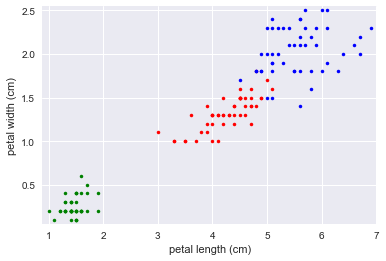

In [19]:
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none', color = 'red')
_ = plt.plot(setosa_petal_length, setosa_petal_width, marker='.', linestyle='none', color = 'green')
_ = plt.plot(virginica_petal_length, virginica_petal_width, marker='.', linestyle='none', color = 'blue')

# Set margins
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('petal width (cm)')

# Show the result
plt.show()

لكل وحدة covariance_matrix بحسب ال

In [22]:
covariance_matrix_setosa = np.cov(setosa_petal_length, setosa_petal_width)
covariance_matrix_versicolor = np.cov(versicolor_petal_length, versicolor_petal_width)
covariance_matrix_virginica = np.cov(virginica_petal_length, virginica_petal_width)

# Print covariance matrix
print(covariance_matrix_setosa, covariance_matrix_versicolor, covariance_matrix_virginica)

# Extract covariance of length and width of petals: petal_cov
petal_cov_setosa = covariance_matrix_setosa[0,1]
petal_cov_versicolor = covariance_matrix_versicolor[0,1]
petal_cov_virginica = covariance_matrix_virginica[0,1]

# Print the length/width covariance
print(petal_cov_setosa, petal_cov_versicolor, petal_cov_virginica)

[[ 0.02954932         nan]
 [        nan         nan]] [[ 0.22081633  0.07310204]
 [ 0.07310204  0.03910612]] [[ 0.30458776  0.04431837]
 [ 0.04431837  0.07657551]]
nan 0.0731020408163 0.0443183673469


Compute Pearson correlation coefficient between two arrays.

In [25]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient
r_setosa = pearson_r(setosa_petal_length, setosa_petal_width)
r_versicolor = pearson_r(versicolor_petal_width, versicolor_petal_length)
r_virginica = pearson_r(virginica_petal_length, virginica_petal_width)

# Print the result
print(r_setosa, r_versicolor, r_virginica)

nan 0.786668088523 0.290190094146


Compute ECDF for a one-dimensional array of measurements.

In [27]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

Draw the plot for three classes 

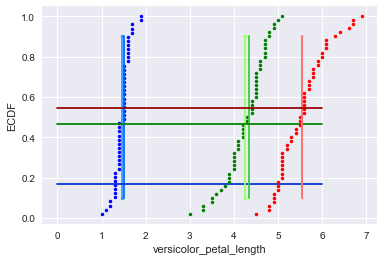

In [29]:
setosa_petal_mean = np.mean(setosa_petal_length)
setosa_petal_median = np.median(setosa_petal_length)
setosa_petal_std = np.std(setosa_petal_length)

versicolor_petal_mean = np.mean(versicolor_petal_length)
versicolor_petal_median = np.median(versicolor_petal_length)
versicolor_petal_std = np.std(versicolor_petal_length)

virginica_petal_mean = np.mean(virginica_petal_length)
virginica_petal_median = np.median(virginica_petal_length)
virginica_petal_std = np.std(virginica_petal_length)

x1, y1 = ecdf(setosa_petal_length)
x2, y2 = ecdf(versicolor_petal_length)
x3, y3 = ecdf(virginica_petal_length)

_=plt.plot(x1, y1, marker='.', linestyle='none', color = 'blue')
_=plt.plot((setosa_petal_mean, setosa_petal_mean),(0.1,0.9), marker='.', color = '#3399ff')
_=plt.plot((setosa_petal_median, setosa_petal_median),(0.1,0.9), marker='_', color = '#0066ff')
_=plt.plot((0,6),(setosa_petal_std, setosa_petal_std), marker='_', color = '#0033cc')

_=plt.plot(x2, y2, marker='.', linestyle='none', color = 'green')
_=plt.plot((versicolor_petal_mean,versicolor_petal_mean),(0.1,0.9), marker='.', color = '#99ff66')
_=plt.plot((versicolor_petal_median,versicolor_petal_median),(0.1,0.9), marker='_', color = '#33cc33')
_=plt.plot((0,6),(versicolor_petal_std, versicolor_petal_std), marker='_', color = '#008000')

_=plt.plot(x3, y3, marker='.', linestyle='none', color='red')
_=plt.plot((virginica_petal_mean ,virginica_petal_mean),(0.1,0.9), marker='.', color = '#ffcccc') #فاتح
_=plt.plot((virginica_petal_median, virginica_petal_median),(0.1,0.9), marker='_', color = '#ff6666') #وسط
_=plt.plot((0,6),(virginica_petal_std, virginica_petal_std), marker='_', color = '#990000') #غامق-خمري

_=plt.xlabel('versicolor_petal_length')
_=plt.ylabel('ECDF')
plt.show()